# Task: Choose a custom dataset, define an expected distribution, and perform the Chi-square goodness-of-fit test.

# Scenario:
 We will test if a 6-sided die is fair. We roll the die 180 times.Custom Dataset (Observed): The results of the 180 rolls.Expected Distribution: A fair die follows a uniform distribution, so we expect each face (1-6) to appear $180 / 6 = 30$ times.

# Lab Report Summary:
We will perform a Chi-square goodness-of-fit test to determine if the results from 180 die rolls are consistent with a fair, 6-sided die.Null Hypothesis ($H_0$): The die is fair (the observed frequencies fit a uniform distribution).Alternative Hypothesis ($H_a$): The die is not fair (the observed frequencies do not fit a uniform distribution).bold text

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# 1. Observed data (Custom Dataset: 180 die rolls)
obs_2 = np.array([28, 33, 25, 30, 35, 29])
categories_2 = ['Face 1', 'Face 2', 'Face 3', 'Face 4', 'Face 5', 'Face 6']

# 2. Expected frequencies (Uniform distribution for a fair die)
total_2 = np.sum(obs_2) # Should be 180
# Expected frequency for each of the 6 faces
expected_2 = np.full_like(obs_2, total_2 / len(obs_2))

# 3. Perform the Chi-square test
# We explicitly provide f_exp this time, though it is uniform.
chi2_stat_2, p_value_2 = stats.chisquare(f_obs=obs_2, f_exp=expected_2)

# 4. Degrees of freedom
df_2 = len(obs_2) - 1

# 5. Critical value
critical_value_2 = stats.chi2.ppf(1 - ALPHA, df_2)

In [12]:
# Create a DataFrame for the table
table_2 = pd.DataFrame({
    'Die Face': categories_2,
    'Observed (O)': obs_2,
    'Expected (E)': expected_2
})
print("--- Assignment 2 Table ---")
print(table_2.to_markdown(index=False))

--- Assignment 2 Table ---
| Die Face   |   Observed (O) |   Expected (E) |
|:-----------|---------------:|---------------:|
| Face 1     |             28 |             30 |
| Face 2     |             33 |             30 |
| Face 3     |             25 |             30 |
| Face 4     |             30 |             30 |
| Face 5     |             35 |             30 |
| Face 6     |             29 |             30 |


In [13]:
# Print the results
print("\n--- Assignment 2 Results ---")
print(f"Significance Level (alpha): {ALPHA}")
print(f"Chi-square Statistic (χ²): {chi2_stat_2:.4f}")
print(f"Degrees of Freedom (df): {df_2}")
print(f"P-value: {p_value_2:.4f}")
print(f"Critical Value: {critical_value_2:.4f}")

# 5. Conclusion
print("\n--- Conclusion ---")
if p_value_2 < ALPHA:
    print(f"P-value ({p_value_2:.4f}) is LESS than alpha ({ALPHA}).")
    print("We REJECT the null hypothesis.")
    print("Conclusion: The die is likely NOT fair.")
else:
    print(f"P-value ({p_value_2:.4f}) is GREATER than alpha ({ALPHA}).")
    print("We FAIL to reject the null hypothesis.")
    print("Conclusion: The observed die rolls are consistent with a fair die.")


--- Assignment 2 Results ---
Significance Level (alpha): 0.05
Chi-square Statistic (χ²): 2.1333
Degrees of Freedom (df): 5
P-value: 0.8304
Critical Value: 11.0705

--- Conclusion ---
P-value (0.8304) is GREATER than alpha (0.05).
We FAIL to reject the null hypothesis.
Conclusion: The observed die rolls are consistent with a fair die.


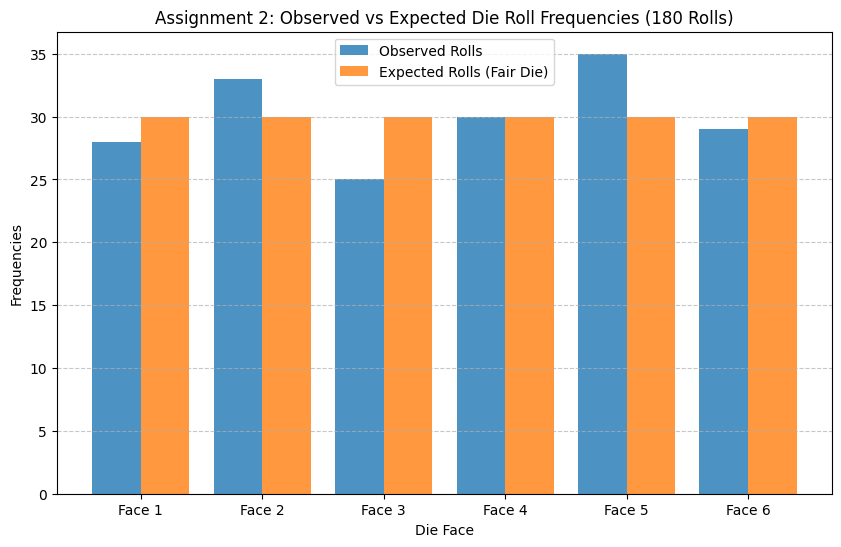

In [14]:
# Plotting the results
plt.figure(figsize=(10, 6))
x_axis = np.arange(len(categories_2))

plt.bar(x_axis - 0.2, obs_2, width=0.4, label='Observed Rolls', alpha=0.8)
plt.bar(x_axis + 0.2, expected_2, width=0.4, label='Expected Rolls (Fair Die)', alpha=0.8)

plt.xticks(x_axis, categories_2)
plt.xlabel('Die Face')
plt.ylabel('Frequencies')
plt.title('Assignment 2: Observed vs Expected Die Roll Frequencies (180 Rolls)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()